In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pySDNN.sdnn import SDNN
from pySDNN import utilities
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [40]:
test_function = utilities.nonaka
# test_function = utilities.linear
# test_function = utilities.cylinder

n_samples=2000
train_X = np.random.uniform(0, 1, size=[n_samples, 2])
train_y = test_function(train_X)
N = 100
xx, yy = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))
test_X = np.c_[np.ravel(xx), np.ravel(yy)]
test_y = test_function(test_X)

# SDNN

0.132424599168


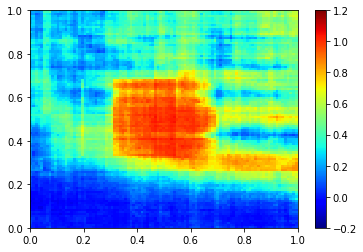

In [35]:
clf=SDNN()
clf.fit(train_X, train_y)
print(clf.score(test_X, test_y))
prediction_y = clf.predict(test_X)
plt.pcolor(xx, yy, prediction_y.reshape([N, N]), vmin=-0.2, vmax=1.2, cmap='jet')
plt.colorbar()

# Support Vector Regression

0.590937631374


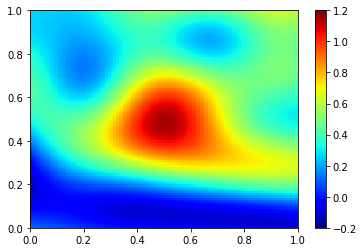

In [36]:
svr=SVR(gamma=10)
svr.fit(train_X, train_y)
print(svr.score(test_X, test_y))
prediction_y = svr.predict(test_X)
plt.pcolor(xx, yy, prediction_y.reshape([N, N]), vmin=-0.2, vmax=1.2, cmap='jet')
plt.colorbar()

# Random Forest

0.903219009403


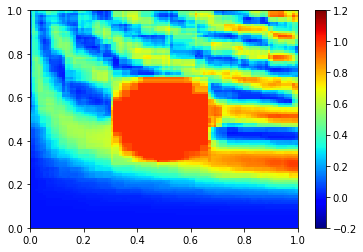

In [37]:
rf= RandomForestRegressor()
rf.fit(train_X, train_y)
print(rf.score(test_X, test_y))
prediction_y = rf.predict(test_X)
plt.pcolor(xx, yy, prediction_y.reshape([N, N]), vmin=-0.2, vmax=1.2, cmap='jet')
plt.colorbar()